In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000, dropout=0.5):
        super().__init__()
        self.feature_extractor1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.feature_extractor2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.feature_extractor3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.feature_extractor4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.feature_extractor5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.classifier = nn.Sequential(
                nn.Dropout(p=dropout),
                nn.Linear(256 * 6 * 6, 4096),
                nn.ReLU(inplace=True),
                nn.Dropout(p=dropout),
                nn.Linear(4096, 4096),
                nn.ReLU(inplace=True),
                nn.Linear(4096, num_classes),
            )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.view(-1, 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [46]:
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torchvision import models
from torchvision.models import AlexNet_Weights

img = Image.open('tench.JPEG').resize((256, 256))
img_tensor = transforms.ToTensor()(img)

model = models.alexnet(weights=AlexNet_Weights.DEFAULT)

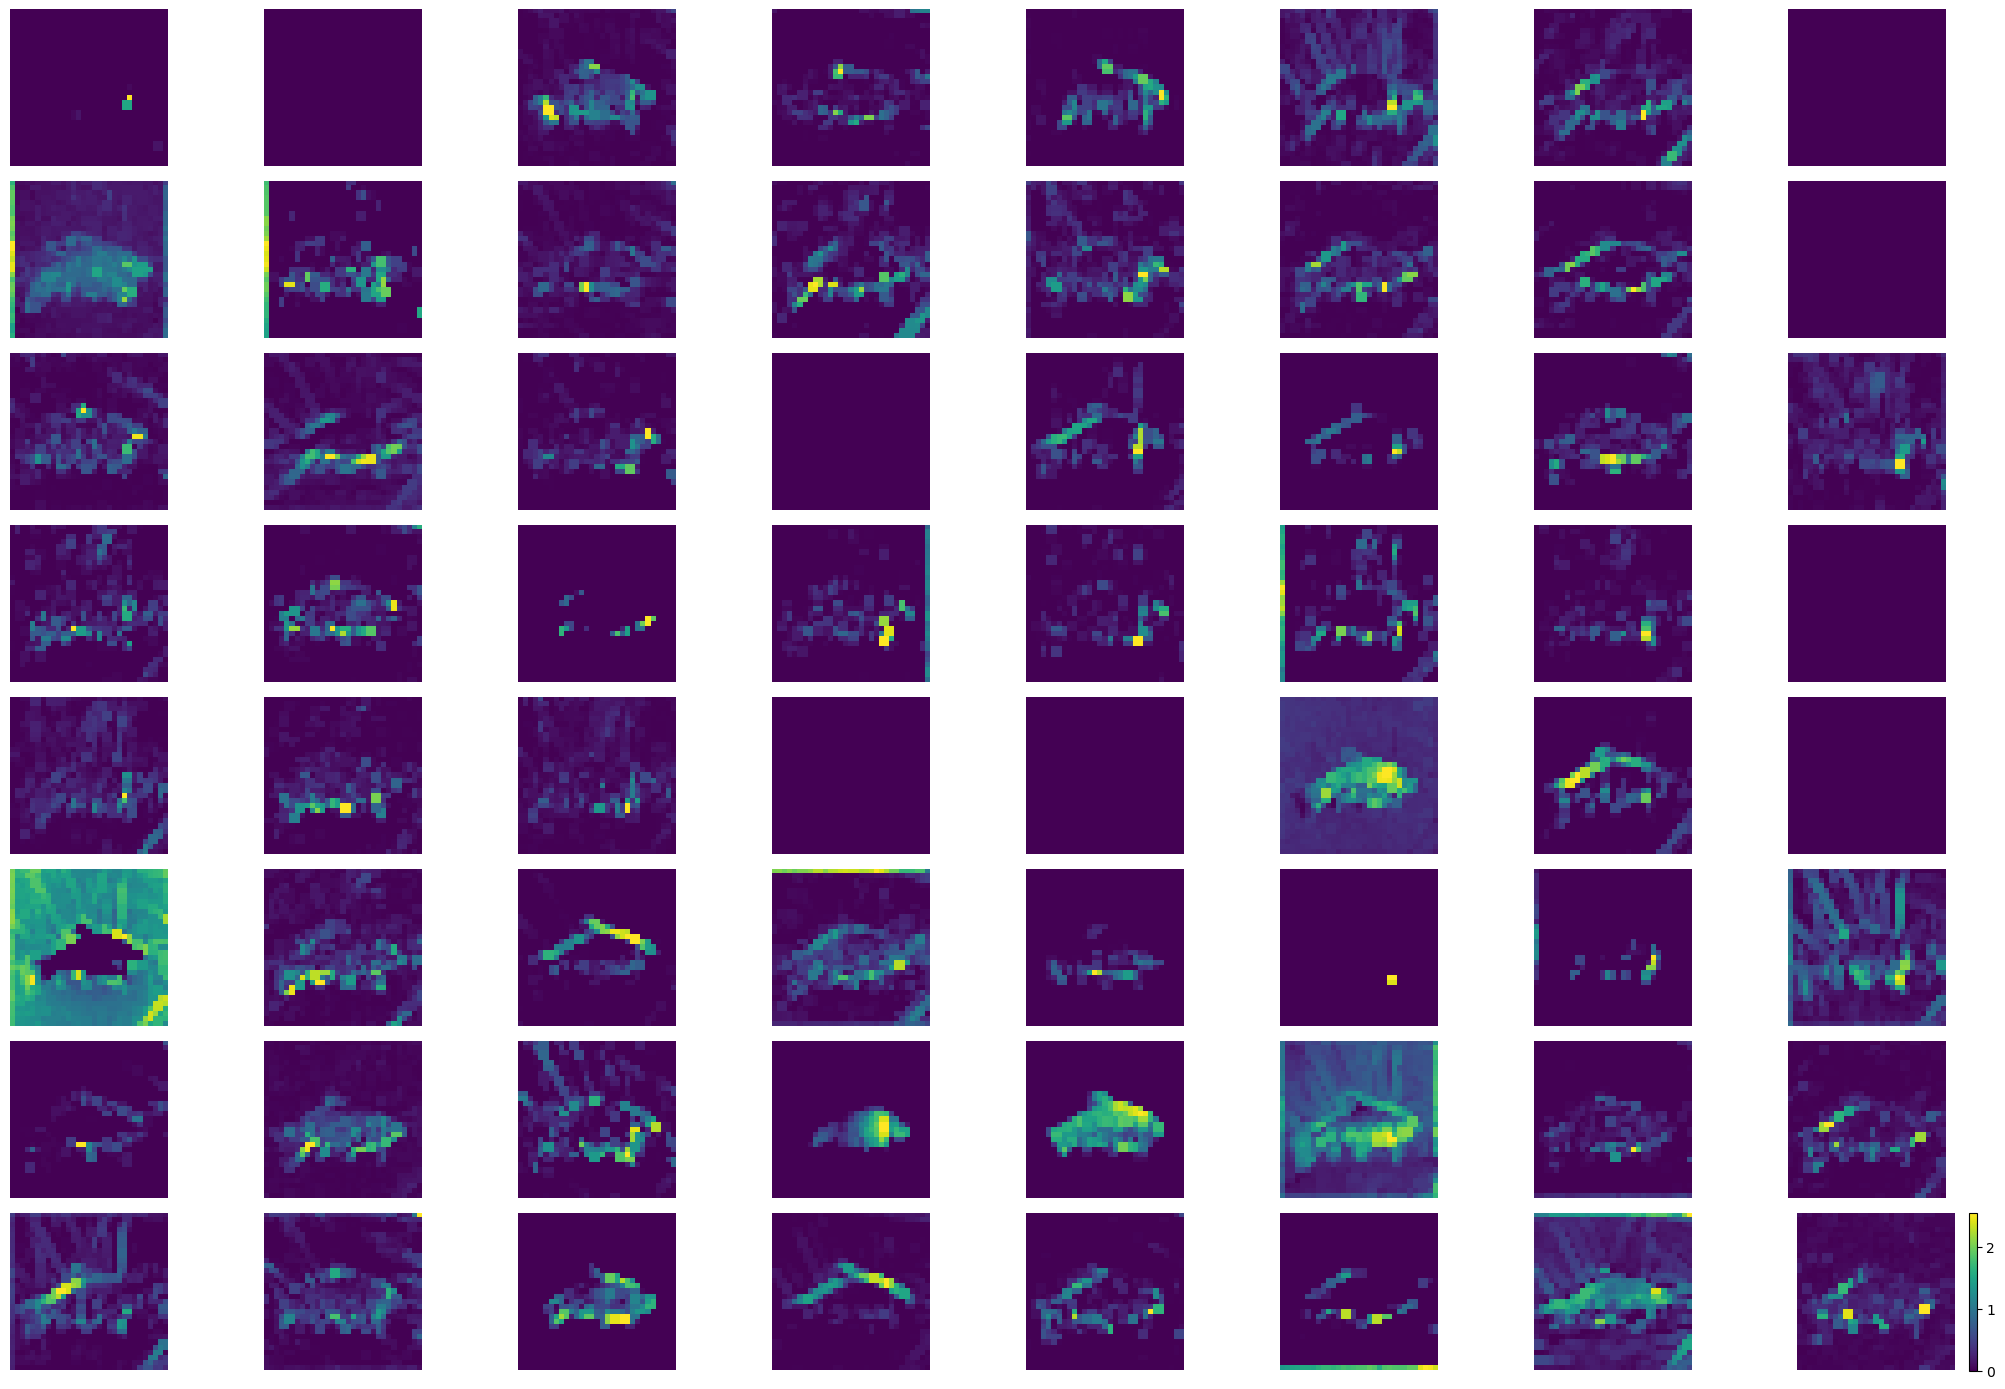

In [112]:
plt.figure(figsize=(21,14))
feature = model.features[:3](img_tensor)
for i in range(feature.size(0)):
    plt.subplot(8, 8, i+1)

    plt.axis('off')
    plt.imshow(feature[i].detach().numpy())
plt.colorbar()
plt.tight_layout()
plt.show()